In [6]:
# テキストファイルを読み込む
with open("アンケート.txt", mode = "r", encoding = "utf-8") as f:
  content = f.read()
print(content)

2021年宿泊者アンケート
---------------
●始めての利用で母と犬とドッグフレンドリールームに宿泊しました。
玄関でのお迎え、車椅子の手配、車の誘導、チェックインまでの誘導はスムーズでした。チェックインもセパレートのテーブルでゆったりと記帳できゲストへのカスタマイズされた対応を感じます。
アテンドして下さった多くのスタッフが若く、そしてフレンドリーで少しびっくりしました。悪い意味でなく開業して間もないホテルではないかと錯覚してしまう程です。非常にフレッシュで親近感をもちました。
高齢の母の入浴時に転倒を危惧しSPAの方に事前相談した所、心良く受けて下さり当日もスムーズな見守り対応をして下さいました。またSPAの営業時間外でも館内スタッフとの連携でアテンドして下さりチームワークの良さを感じました。
夕方のカクテルアワー及び客室内のミネラルウォーターの無料利用は魅力的です。
さらにダイニングでの朝食時、マネージャーの方が母の為に配膳して下さった事も助かりました。シニア層向けにも優しいホテルだと思います。
ぜひまた利用させて頂きます。
犬も大満足そうです。
---------------
●デラックスツインに宿泊しましたが目の前に見える大文字焼きの山を含めた雄大な景色に感激しました
お部屋も広々としていてトイレが独立しているのが落ち着けて良かったです
17時頃ラウンジのカクテルサービスに行きましたが席もまだ沢山空いていました
暖炉の周りには座れませんでしたが主人はビール私はマンゴーのサッパリしたドリンクで夕食までの時間をゆったりと過ごせました
夕食は鮨懐石にしましたが大正解でした。
一品一品丁寧な仕事ぶりと美味しさに感激です。
お醤油まで手作りしていると伺いびっくりしました
長芋のわさび漬けは箸休め程度に置かれていましたが美味しくて出来れば持ち帰りたい程でした
握りの美味しさはもちろんデザートのワインゼリーの上にキウイのムース、アイスクリームのせのバランスの良さに最後まで感激していました
ホテルの気ままに過ごせる良さと旅館の様な館内全て夕食時でも浴衣で過ごせる気軽さがとても良いと思います
---------------
●客室は広く、景色も本当に綺麗でした。また、接客、サービスも基本的には素晴らしかったです。
ただ、乳児連れでグループで個室を取りお鮨をいた

In [ ]:
# 不要な文字を削除する
content = content.replace("-", "")
content = content.replace("●", "")
content = content.replace("2021年宿泊者アンケート", "")
content = content.replace("\n", "")
print(content)

In [ ]:
%%bash

apt install -yq \
  mecab \
  mecab-ipadic-utf8 \
  libmecab-dev
pip install -q mecab-python3==0.996.5
ln -s /etc/mecabrc /usr/local/etc/mecabrc

In [9]:
pip list | grep mecab

mecab-python3                 0.996.5


In [ ]:
# フォントのインストール
!apt-get -yq install fonts-ipafont-gothic

In [ ]:
# matplotの日本語化
!pip install -q japanize-matplotlib

In [ ]:
# MeCabのインストール
import MeCab
import re

tagger = MeCab.Tagger()

# tagger.parse(【対象の文字列】)
# 対象の文章の形態素解析を行う。（日本語を最小単位の品詞に分解する）
parsed = tagger.parse(content).split("\n")

# 形態素解析の結果である「parsed」の出力結果を確認する
# ※先頭の10行のみ表示
parsed[:]

# データを分割する
*values, = map(lambda s: re.split(r"\t|,",s), parsed)
values[:4]

In [92]:
# pandasをインポートする
import pandas as pd

# カラムの名前を設定する
# カラムごとに分ける
columns = ["表層形", "品詞", "品詞細分類1", "品詞細分類2", "品詞細分類3", "活用型", "活用形", "原形", "読み", "発音"]
mecab_df = pd.DataFrame(data=values, columns=columns)
mecab_df

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,始めて,副詞,一般,*,*,*,*,始めて,ハジメテ,ハジメテ
1,の,助詞,連体化,*,*,*,*,の,ノ,ノ
2,利用,名詞,サ変接続,*,*,*,*,利用,リヨウ,リヨー
3,で,助詞,格助詞,一般,*,*,*,で,デ,デ
4,母,名詞,一般,*,*,*,*,母,ハハ,ハハ
...,...,...,...,...,...,...,...,...,...,...
3134,まし,助動詞,*,*,*,特殊・マス,連用形,ます,マシ,マシ
3135,た,助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
3136,。,記号,句点,*,*,*,*,。,。,。
3137,EOS,None,None,None,None,None,None,None,None,None


In [91]:
# 品詞が名詞のものだけ表示する
noun = mecab_df.loc[mecab_df["品詞"] == "名詞"]
noun

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
2,利用,名詞,サ変接続,*,*,*,*,利用,リヨウ,リヨー
4,母,名詞,一般,*,*,*,*,母,ハハ,ハハ
6,犬,名詞,一般,*,*,*,*,犬,イヌ,イヌ
8,ドッグフレンドリールーム,名詞,一般,*,*,*,*,*,None,None
10,宿泊,名詞,サ変接続,*,*,*,*,宿泊,シュクハク,シュクハク
...,...,...,...,...,...,...,...,...,...,...
3105,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
3117,問題,名詞,ナイ形容詞語幹,*,*,*,*,問題,モンダイ,モンダイ
3122,温泉,名詞,一般,*,*,*,*,温泉,オンセン,オンセン
3124,適温,名詞,一般,*,*,*,*,適温,テキオン,テキオン


In [89]:
# stop_words.txtを読み込む
with open("stop_words.txt", mode = "r") as f:
  stop_words = f.read().split()
stop_words

['する', 'いる', 'なる', 'れる', 'よう']

In [90]:
# 原形の中に入っているstop_wordsを削除する
noun = noun.loc[~noun["原形"].isin(stop_words)]
display(noun.head())

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
2,利用,名詞,サ変接続,*,*,*,*,利用,リヨウ,リヨー
4,母,名詞,一般,*,*,*,*,母,ハハ,ハハ
6,犬,名詞,一般,*,*,*,*,犬,イヌ,イヌ
8,ドッグフレンドリールーム,名詞,一般,*,*,*,*,*,None,None
10,宿泊,名詞,サ変接続,*,*,*,*,宿泊,シュクハク,シュクハク


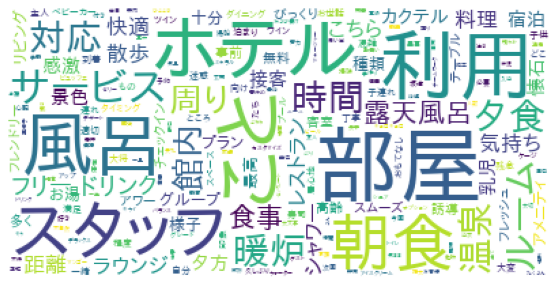

In [38]:
# ワードクラウドをインポートする
from wordcloud import WordCloud 
# matplotlibをインポートする
import matplotlib.pyplot as plt
# 日本語に対応させる
import japanize_matplotlib

# フォントをインストールしたパス
font_path = "usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf"

# ワードクラウドで何を表示するか設定をする
cloud = WordCloud(background_color="white", font_path=font_path).generate(" ".join(noun["原形"].values))

# 大きさを設定する
plt.figure(figsize=(10, 5))

# ワードクラウドを表示する
plt.imshow(cloud)
plt.axis("off")

# 表示したワードクラウドを保存する
plt.savefig("ds_exam2_3_黒崎輝.png")


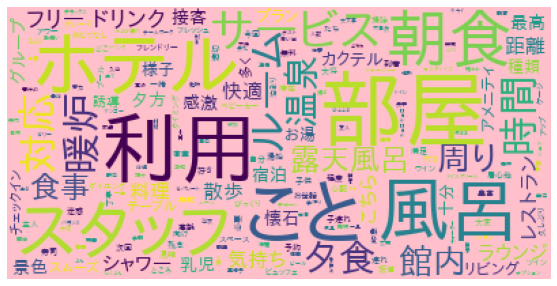

In [84]:
# ワードクラウドで何を表示するか設定をする
cloud2 = WordCloud(background_color="pink", font_path=font_path).generate(" ".join(noun["原形"].values))

# 大きさを設定する
plt.figure(figsize=(10, 5))

# ワードクラウドを表示する
plt.imshow(cloud2)
plt.axis("off")

# 表示したワードクラウドを保存する
plt.savefig("ds_exam.png")

In [83]:
# ワードクラウドに必要なモジュールをインポートする
from PIL import Image
import numpy as np
!pip3 install wordcloud

In [85]:
# その形にしたい画像を変数に入れる
mask1 = np.array(Image.open("hotel.png"))

In [86]:
# ワードクラウドで何を表示するか設定する
wc1 = WordCloud(background_color="white", colormap = "Purples", mask=mask1, font_path=font_path, contour_width=3, contour_color="black").generate(" ".join(noun["原形"].values))

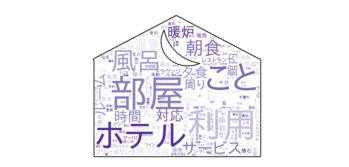

<Figure size 432x288 with 0 Axes>

In [93]:
# 設定したものを表示する
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.show()
fig = plt.figure()

# 表示したワードクラウドを保存する
fig.savefig("wc.png")